<a href="https://colab.research.google.com/github/GuilhermeVCCdaSilva/ProjetoBD/blob/main/ProjetoBigData_GuilhermeSilvaMarineFournieGon%C3%A7aloAlves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.estbarreiro.ips.pt/Content/images/logo-ESTB.png" align="right" alt="EsT Logo circle logo" style="height: 200px; width:300px;"/>

# Projeto Final Big Data 
* __Guilherme Silva__
* __Marine Emilie Fournier__
* __Gonçalo Alves__

In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=7c30b8e78ea80576975e4a8c79d3a7b875e849eed71ef0aa3b1115d22265e1a5
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Introdução

### Objetivos e Fundamentos do projeto

- Este projeto de BigData tem como objetivo usar algoritmos de Machine Learning, recorrendo ao uso do PySpark, pois o mesmo ajuda o processamento de grandes quantidades de dados e é incorpurado com ferramentas para prever resultados importantes em relação a um conjunto de dados.
-  O Spark é uma ferramenta poderosa que permite o processamento distribuído de dados.
- Também vamos usar o Spark para ler, limpar e preparar os dados, avaliar e ajustar modelos e, finalmente, fazer previsões precisas e relevantes.
- Além disso, vamos usar técnicas avançadas de análise para visualizar e interpretar os resultados, a fim de obter insights valiosos. 
- Este projeto é uma excelente oportunidade para aplicar e praticar habilidades de Machine Learning em um ambiente de grande escala e de alta performance.


### Introdução do DataSet em uso

- O nosso conjunto de dados inclui informações como as razões para ausência, gastos de transporte, distância de residência para trabalho, tempo de serviço, carga de trabalho, desempenho, educação, estado pessoal e informações demográficas dos funcionários, bem como a duração do absentismo. 
- Temos como objetivo utilizar técnicas Machine Learning para identificar padrões e tendências nos dados e talvez prever a probabilidade de uma certa pessoa se absentir no futuro. 
- Com base nas descobertas, pode-se tomar medidas para reduzir o absentismo e melhorar o desempenho de uma empresa.





##Criar uma "SparkSession"
- Para se trabalhar com dados no Spark, é essencial criar uma SparkSession, este passo é fundamental e o primeiro a ser realizado. Ela é responsável por gerenciar a configuração do Spark, criar RDDs (Resilient Distributed Datasets) e DataFrames, registar tabelas temporárias e gerenciar os recursos do cluster utilizados.

- A SparkSession é o ponto de partida para trabalhar com dados estruturados e relacionais no Spark SQL, o módulo do Spark que fornece suporte para essa funcionalidade. Ele permite que você execute consultas SQL, manipule DataFrames e extraia metadados. Ele também oferece acesso às bibliotecas de processamento de fluxo de dados (como o DataFrame API e o SQL) e às bibliotecas de aprendizado de máquina (como o MLlib) do Spark.

- A SparkSession (criada usando SparkSession.builder) é uma classe fundamental para trabalhar com dados no Spark, é através dela que é possível configurar e gerenciar a sessão, estabelecer conexões com o cluster, definir opções de configuração e gerenciar recursos como o número de núcleos para usar e a quantidade de memória. É a porta de entrada para trabalhar com dados estruturados e relacionais no Spark SQL.

- A configuração ".config("spark.memory.offHeap.enabled")" permite habilitar o uso de memória fora da heap (off-heap). Quando essa configuração é definida como "true", o Spark pode usar memória fora do heap do JVM para armazenar os dados e realizar operações. Isso permite que o Spark armazene e execute operações com mais dados, o que pode melhorar o desempenho quando a memória disponível dentro da heap não é suficiente.

- A configuração ".config("spark.memory.offHeap.size","10g")" permite definir a quantidade de memória fora do heap (off-heap) disponível para o Spark usar. Neste caso, o valor "10g" indica que o Spark pode usar até 10 gigabytes de memória fora do heap. Esse valor pode ser ajustado de acordo com o tamanho dos dados e as necessidades do seu aplicativo para garantir o melhor desempenho possível.

In [2]:
from pyspark.sql import SparkSession
import findspark

findspark.init()

spark = SparkSession.builder.appName("Pyspark ProjetoBD")\
                    .config("spark.memory.offHeap.enabled","true")\
                    .config("spark.memory.offHeap.size","20g")\
                    .getOrCreate()
spark                    

##Carregamento dos dados do DataSet criação do DataFrame:
Link para o DataSet: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [3]:
!curl https://raw.githubusercontent.com/GuilhermeVCCdaSilva/ProjetoBD/main/Absenteeism_at_work.csv >> Absenteeism_at_work.csv
df = spark.read.csv('Absenteeism_at_work.csv',header=True,sep=";")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45232  100 45232    0     0   187k      0 --:--:-- --:--:-- --:--:--  187k


##"Data Visualization" e Análise

- Primeiramente vamos tamanho e o tipo de dados do nosso Dataset.

- Este passo era mais simples ser executado através do método shape, mas como o não é suportado pelo PySpark DataFrame, no entanto, podemos contar o número de linhas e colunas usando o método count() e verificar o esquema (colunas e tipos de dados) do DataFrame usando o método printSchema().

In [4]:
print("Numero de Linhas:", df.count())
print("Numero de Colunas:", len(df.columns))
print("Esquema do DataFrame: ")
df.printSchema()

Numero de Linhas: 740
Numero de Colunas: 21
Esquema do DataFrame: 
root
 |-- ID: string (nullable = true)
 |-- Reason for absence: string (nullable = true)
 |-- Month of absence: string (nullable = true)
 |-- Day of the week: string (nullable = true)
 |-- Seasons: string (nullable = true)
 |-- Transportation expense: string (nullable = true)
 |-- Distance from Residence to Work: string (nullable = true)
 |-- Service time: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Work load Average/day : string (nullable = true)
 |-- Hit target: string (nullable = true)
 |-- Disciplinary failure: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Son: string (nullable = true)
 |-- Social drinker: string (nullable = true)
 |-- Social smoker: string (nullable = true)
 |-- Pet: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Body mass index: string (nullable = true)
 |-- Absenteeism time in hours: string (n

Resumindo: 
- O DataFrame tem 8891 linhas e 21 colunas. O esquema do DataFrame mostra que todas as colunas são do tipo string e são nullable (podem conter valores nulos). Algumas das colunas incluem "ID", "Reason for absence", "Month of absence", "Age" e "Absenteeism time in hours".

In [5]:
df.show(10)

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

##Descrição das variáveis do DataFrame:

- ID: Identificador único para cada registo.
- Razão para a ausência: Razão para a ausência do funcionário no trabalho.
- Mês da ausência: O mês em que o funcionário estava ausente.
- Dia da semana: O dia da semana em que o funcionário estava ausente.
- Estações: A estação do ano em que o funcionário estava ausente.
- Despesas de transporte: As despesas de transporte incorridas pelo funcionário ao viajar para o trabalho.
- Distância da residência para o trabalho: A distância entre a residência do funcionário e o local de trabalho.
- Tempo de serviço: O período de tempo em que o funcionário está a trabalhar na empresa.
- Idade: A idade do funcionário.
- Carga de trabalho média/dia: A carga de trabalho média do funcionário por dia.
- Alvo atingido: Se o funcionário atingiu ou não o alvo
- Falha disciplinar: Se o funcionário cometeu alguma falha disciplinar ou não.
- Educação: O nível de educação do funcionário.
- Filhos: O número de filhos que o funcionário tem.
- Bebedor social: Se o funcionário bebe socialmente ou não.
- Fumador social: Se o funcionário fuma socialmente ou não.
- Animal de estimação: Se o funcionário tem algum animal de estimação ou não.
- Peso: O peso do funcionário.
- Altura: A altura do funcionário.
- Índice de massa corporal: O índice de massa corporal do funcionário.
- Tempo de ausência em horas: O número de horas que o funcionário ficou ausente.

In [6]:
df = df.drop("id")

- Removeu-se a coluna ID pois não é relevante para os algoritmos de aprendizado de máquina.

In [7]:
df.show(10)

+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|                26|               7|              3|      1|                   289|                             36|        

##Perguntas ao DataSet

###1- Qual a dispersão dos pesos registados?

In [8]:
from pyspark.sql.functions import stddev

df.groupBy().agg(stddev("Height")).show()



+-------------------+
|stddev_samp(Height)|
+-------------------+
|  6.034994530267662|
+-------------------+



-  Neste caso, podemos ver que os valores da coluna "Height" variam cerca de 6.03 unidades em relação à média.

###2- Qual é a maior Distância do trabalho registada?

In [9]:
df.createOrReplaceTempView("data")
spark.sql("SELECT MAX(`Distance from Residence to Work`) FROM data").show()

+------------------------------------+
|max(Distance from Residence to Work)|
+------------------------------------+
|                                  52|
+------------------------------------+



- A maior distância de residência para trabalho registada é de 52.

###3- Qual é a soma da coluna "Absenteeism time in hours" para cada valor único na coluna "Education"?

In [10]:
from pyspark.sql.functions import sum


result = df.groupBy("Education").agg(sum("Absenteeism time in hours").alias("sum_absenteeism"))
result = result.orderBy("Education")
result.show()

+---------+---------------+
|Education|sum_absenteeism|
+---------+---------------+
|        1|         4393.0|
|        2|          294.0|
|        3|          416.0|
|        4|           21.0|
+---------+---------------+



- Podemos ver que a educação de nível 3 tem uma soma de 416 horas de absenteísmo, a educação de nível 1 tem uma soma de 4393 horas de absenteísmo, a educação de nível 4 tem uma soma de 21 horas de absenteísmo e a educação de nível 2 tem uma soma de 294 horas de absenteísmo.
- Ou seja, o Absenteeism time in hours praticamente diretamente relacionado com o nivel de Educação, as pessoas com educação de nivel 1 ficam muito mais ausentes que os de nivel 4

##Pré tratamento e Análise exploratória de dados

###Vamos então verificar a existencia de valores ausentes em cada coluna.

In [11]:
# criar uma lista para armazenar o número de valores ausentes em cada coluna.
missing_values = []

# iterar através das colunas no conjunto de dados.
for col in df.columns:
    missing_values.append((col, df.filter(df[col].isNull()).count()))

# print os valores inexistentes
for col, val in missing_values:
    if val == 0:
        print("{} : Nunhum missing values encontrado".format(col))
    else:
        print("{} : {} missing values".format(col, val))

Reason for absence : Nunhum missing values encontrado
Month of absence : Nunhum missing values encontrado
Day of the week : Nunhum missing values encontrado
Seasons : Nunhum missing values encontrado
Transportation expense : Nunhum missing values encontrado
Distance from Residence to Work : Nunhum missing values encontrado
Service time : Nunhum missing values encontrado
Age : Nunhum missing values encontrado
Work load Average/day  : Nunhum missing values encontrado
Hit target : Nunhum missing values encontrado
Disciplinary failure : Nunhum missing values encontrado
Education : Nunhum missing values encontrado
Son : Nunhum missing values encontrado
Social drinker : Nunhum missing values encontrado
Social smoker : Nunhum missing values encontrado
Pet : Nunhum missing values encontrado
Weight : Nunhum missing values encontrado
Height : Nunhum missing values encontrado
Body mass index : Nunhum missing values encontrado
Absenteeism time in hours : Nunhum missing values encontrado


- Podemos então concluir que não existem missing values

### Transformação dos dados

#### Verifiquar os tipos de dados das colunas.

In [12]:
df.dtypes

[('Reason for absence', 'string'),
 ('Month of absence', 'string'),
 ('Day of the week', 'string'),
 ('Seasons', 'string'),
 ('Transportation expense', 'string'),
 ('Distance from Residence to Work', 'string'),
 ('Service time', 'string'),
 ('Age', 'string'),
 ('Work load Average/day ', 'string'),
 ('Hit target', 'string'),
 ('Disciplinary failure', 'string'),
 ('Education', 'string'),
 ('Son', 'string'),
 ('Social drinker', 'string'),
 ('Social smoker', 'string'),
 ('Pet', 'string'),
 ('Weight', 'string'),
 ('Height', 'string'),
 ('Body mass index', 'string'),
 ('Absenteeism time in hours', 'string')]


- É possível observar que todas as colunas são do tipo "string", o que pode precisar ser convertido para outro tipo de dado para melhorar a análise e modelagem de Machine Learning.

#### Vamos então converter tipo de dados string para double para melhorar a análise e modelagem de Machine Learning.

In [13]:
from pyspark.sql.functions import col
for column in df.columns:
    df = df.withColumn(column, col(column).cast("double"))

In [14]:
df.dtypes

[('Reason for absence', 'double'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double'),
 ('Absenteeism time in hours', 'double')]

- Agora os dados podem ser manipulados e analisados com mais facilidade, pois o tipo "double" permite operações matemáticas, ao contrário do tipo "string". E também estão corretamente configurados para que os algoritmos de Machine Learning funcionem corretamente.

### Mapear os valores inteiros da coluna "Reason for absence" para descrições de texto correspondentes.

In [15]:
from pyspark.sql.functions import when
from pyspark.sql.functions import array
from pyspark.sql.functions import udf
# Criar o dicionario mapping 
mapping_dict = {
    0: "CID - Patient follow-up",
    1: "CID - Medical consultation",
    2: "CID - Blood donation",
    3: "CID - Laboratory examination",
    4: "CID - Unjustified absence",
    5: "CID - Physiotherapy",
    6: "CID - Dental consultation",
    7: "Certain infectious and parasitic diseases",
    8: "Neoplasms",
    9: "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    10: "Endocrine, nutritional and metabolic diseases",
    11: "Mental and behavioural disorders",
    12: "Diseases of the nervous system",
    13: "Diseases of the eye and adnexa",
    14: "Diseases of the ear and mastoid process",
    15: "Diseases of the circulatory system",
    16: "Diseases of the respiratory system",
    17: "Diseases of the digestive system",
    18: "Diseases of the skin and subcutaneous tissue",
    19: "Diseases of the musculoskeletal system and connective tissue",
    20: "Diseases of the genitourinary system",
    21: "Pregnancy, childbirth and the puerperium",
    22: "Certain conditions originating in the perinatal period",
    23: "Congenital malformations, deformations and chromosomal abnormalities",
    24: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    25: "Injury, poisoning and certain other consequences of external causes",
    26: "External causes of morbidity and mortality",
    27: "Factors influencing health status and contact with health services"
}

# Criar a função definida pelo usuário.
map_reason = udf(lambda x: mapping_dict.get(x))

# Aplicar a função definida pelo usuário ao dataframe
df = df.withColumn("Reason for absence", map_reason(col("Reason for absence")))

#### Resultado:

In [16]:
# Seleciona a coluna específica "Reason for absence" e mostra o conteúdo da mesma.
df.select("Reason for absence").show()

+--------------------+
|  Reason for absence|
+--------------------+
|External causes o...|
|CID - Patient fol...|
|Congenital malfor...|
|Certain infectiou...|
|Congenital malfor...|
|Congenital malfor...|
|Certain condition...|
|Congenital malfor...|
|Diseases of the m...|
|Certain condition...|
|CID - Medical con...|
|CID - Medical con...|
|Mental and behavi...|
|Mental and behavi...|
|Congenital malfor...|
|Diseases of the e...|
|Congenital malfor...|
|Pregnancy, childb...|
|Mental and behavi...|
|Congenital malfor...|
+--------------------+
only showing top 20 rows



- Tendo então a coluna "Reason for absence" mapeada, podemos então facilitar a intrepertação dos dados em graficos e algoritmos futuros

In [17]:
df.show(10)

+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|  Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time| Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|External causes o...|             7.0|            3.0|    1.0|                 289.0|                           36

In [18]:
df.dtypes

[('Reason for absence', 'string'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double'),
 ('Absenteeism time in hours', 'double')]

### Verifica as estatísticas das colunas numéricas.


In [19]:
df.describe().toPandas()

,summary,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,count,628,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
1,mean,None,6.324324324324325,3.9148648648648647,2.5445945945945945,221.32972972972973,29.63108108108108,12.554054054054054,36.45,271.49023513513544,...,0.05405405405405406,1.2918918918918918,1.018918918918919,0.5675675675675675,0.07297297297297298,0.745945945945946,79.03513513513514,172.11486486486487,26.677027027027027,6.924324324324324
2,stddev,None,3.4362869319125897,1.4216747097562805,1.111831060157382,66.95222324531973,14.836788436739143,4.384873407621148,6.478772457611868,39.058116188144055,...,0.22627727323215058,0.6732380415251598,1.0984890195302817,0.49574866720003496,0.2602680502800183,1.3182582913258336,12.883210507177214,6.034994530267662,4.285452223167274,13.330998100978196
3,min,CID - Blood donation,0.0,2.0,1.0,118.0,5.0,1.0,27.0,205.917,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,163.0,19.0,0.0
4,max,"Symptoms, signs and abnormal clinical and labo...",12.0,6.0,4.0,388.0,52.0,29.0,58.0,378.884,...,1.0,4.0,4.0,1.0,1.0,8.0,108.0,196.0,38.0,120.0


- É possível observar algumas informações gerais sobre cada coluna numérica no dataframe. Por exemplo, podemos ver o número total de entradas (count), a média, a desvio padrão, o valor mínimo e máximo. Estas informações podem ser úteis para entender melhor a distribuição dos dados e identificar possíveis outliers ou valores incomuns.

### Verifica a correlação entre as colunas.

In [20]:
corr = df.stat.corr("Month of absence", "Transportation expense")
print(corr)

0.13752456639267643


- A correlação varia entre -1 e 1, sendo que valores próximos a -1 indicam uma correlação negativa forte, valores próximos a 1 indicam uma correlação positiva forte e valores próximos a 0 indicam ausência de correlação.
- Neste caso como output ~ 0.1423, o que indica uma correlação fraca entre as duas colunas, não havendo realação entre os valores da coluna "Month of absence" e da coluna "Transportation expense".

### Verifica o número de valores únicos em cada coluna.

In [21]:
for col in df.columns:
    print("Unique values in column '{}':".format(col), df.select(col).distinct().count())

Unique values in column 'Reason for absence': 28
Unique values in column 'Month of absence': 13
Unique values in column 'Day of the week': 5
Unique values in column 'Seasons': 4
Unique values in column 'Transportation expense': 24
Unique values in column 'Distance from Residence to Work': 25
Unique values in column 'Service time': 18
Unique values in column 'Age': 22
Unique values in column 'Work load Average/day ': 38
Unique values in column 'Hit target': 13
Unique values in column 'Disciplinary failure': 2
Unique values in column 'Education': 4
Unique values in column 'Son': 5
Unique values in column 'Social drinker': 2
Unique values in column 'Social smoker': 2
Unique values in column 'Pet': 6
Unique values in column 'Weight': 26
Unique values in column 'Height': 14
Unique values in column 'Body mass index': 17
Unique values in column 'Absenteeism time in hours': 19


- Podemos então dizer que a coluna que tem mais valores unicos é a "Reason for absence" (28), enquanto que a coluna que tem menos é a "Disciplinary failure" (3).
- Isto pode-nos ajudar a perceber a diversidade de valores em cada coluna e identificar se alguma coluna precisa ser tratada de forma diferente. 


### Verifica a distribuição de cada coluna.

In [22]:
for col in df.columns:
    df.select(col).groupBy(col).count().show()

+--------------------+-----+
|  Reason for absence|count|
+--------------------+-----+
|Congenital malfor...|  149|
|Symptoms, signs a...|    3|
|CID - Dental cons...|    8|
|CID - Unjustified...|    2|
|                null|  112|
|Diseases of the e...|   55|
|CID - Laboratory ...|    1|
|CID - Blood donation|    1|
|Injury, poisoning...|   31|
|           Neoplasms|    6|
|CID - Patient fol...|   43|
|Pregnancy, childb...|    6|
|Endocrine, nutrit...|   25|
|Diseases of the b...|    4|
|Diseases of the c...|    2|
| CID - Physiotherapy|    3|
|Diseases of the m...|   40|
|Diseases of the e...|   19|
|Certain condition...|   38|
|Diseases of the s...|   21|
+--------------------+-----+
only showing top 20 rows

+----------------+-----+
|Month of absence|count|
+----------------+-----+
|             8.0|   54|
|             0.0|    3|
|             7.0|   67|
|             1.0|   50|
|             4.0|   53|
|            11.0|   63|
|             3.0|   87|
|             2.0|   72|
|  

- Com este output podemos ver o nome de cada coluna e o número de ocorrências para cada valor único. Isto permite uma visão geral dos dados, incluindo a verificação de valores ausentes (null) e a distribuição de valores para cada coluna.
- A tabela "Reason for absence" apresenta a maior distribuição, seguida por "Month of absence" e "Day of the week". Os valores mais frequentes são "Congenital malformations", "Diseases of the eye" e "Diseases of the musculoskeletal system".

### Gráficos

#### Grafico com a  frequência de cada categoria na coluna "Reason for absence"

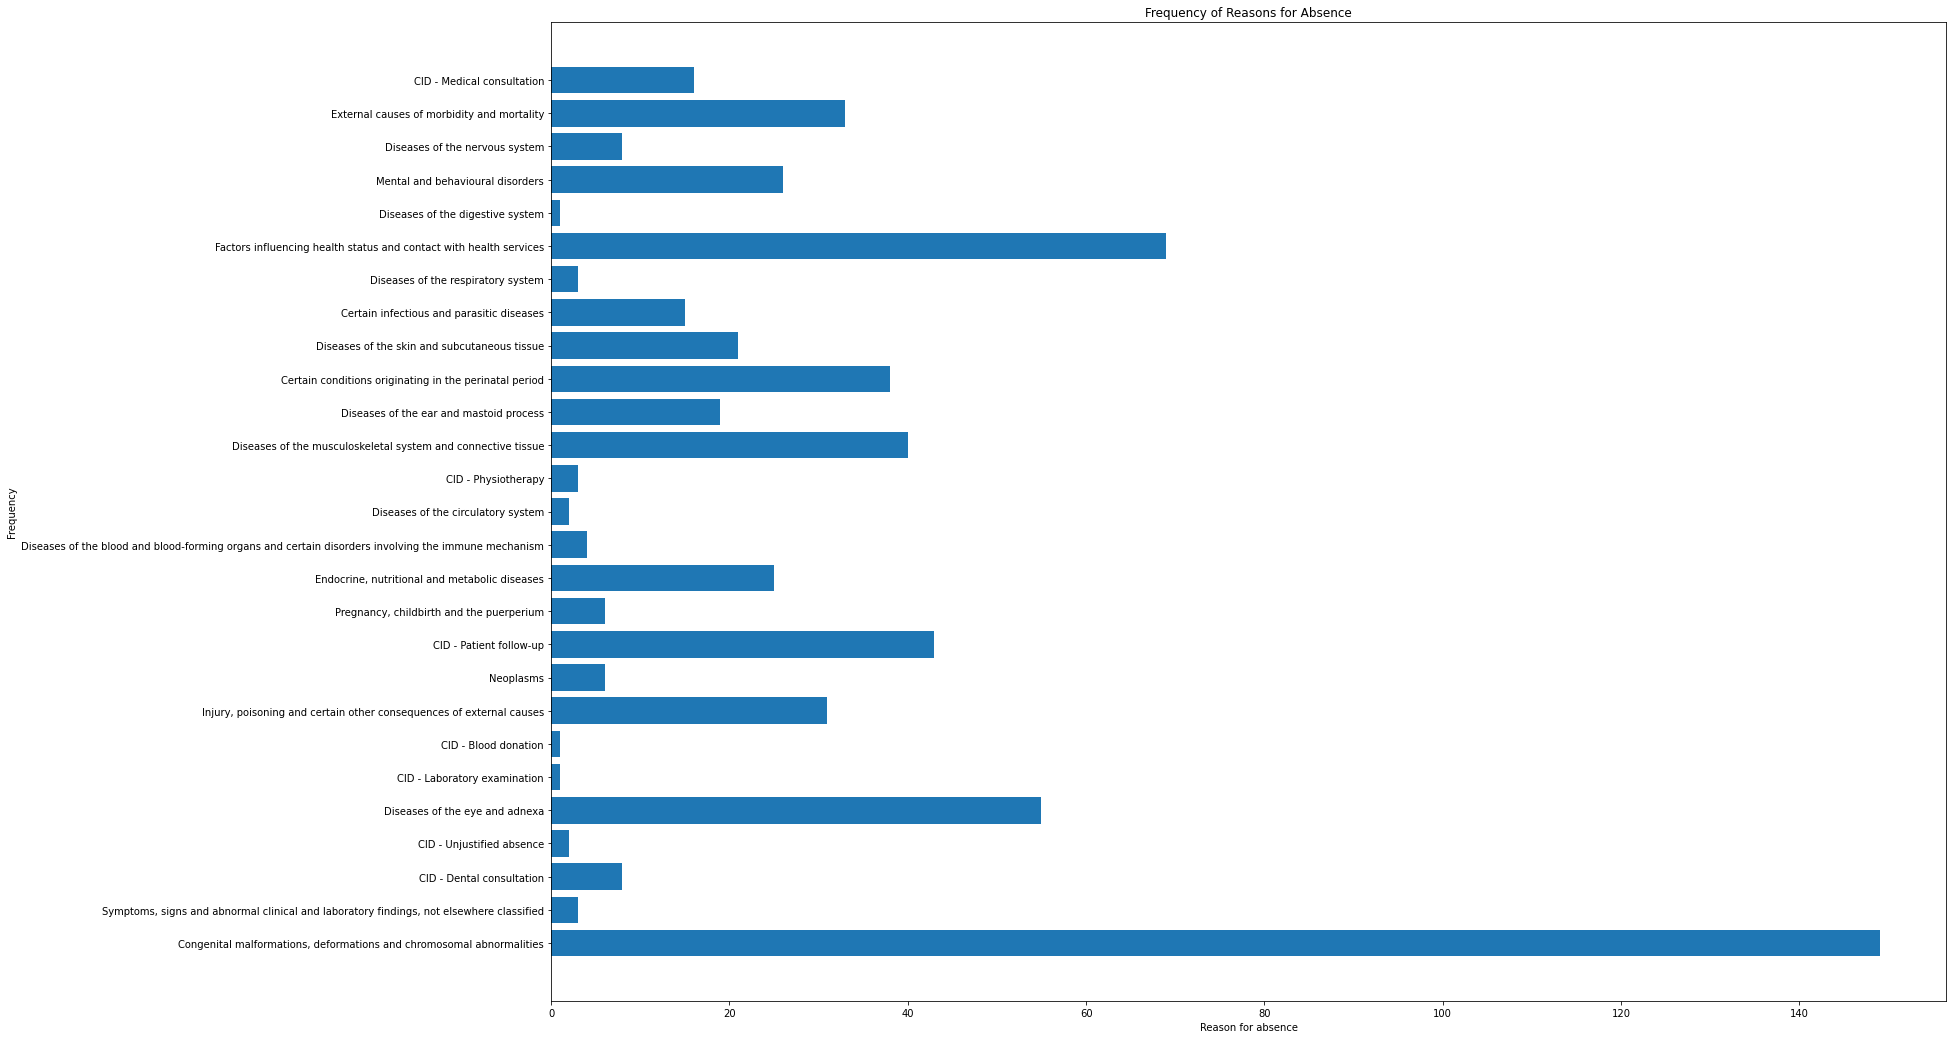

In [23]:
import matplotlib.pyplot as plt

# A contagem da frequência de cada categoria na coluna "Reason for absence" 
df = df.dropna(subset = ["Reason for absence"])
reason_counts = df.groupBy("Reason for absence").count().toPandas()

# Criar um gráfico de barras
plt.figure(figsize=(25, 18))
plt.barh(reason_counts["Reason for absence"], reason_counts["count"])
plt.xlabel("Reason for absence")
plt.ylabel("Frequency")
plt.title("Frequency of Reasons for Absence")

plt.show()

- Esse gráfico mostra a frequência de ausência de cada categoria de justificação. A partir daí, é possível ver facilmente qual é a razão mais comum para a ausência que neste caso é "Congenital malformations, deformations and chromosomal abnormalities", e também comparar as frequências entre as diferentes razões. Também, pode-se observar que a maioria das razões tem baixa frequencia, e que poucas razões representam a maioria das ausencias.

#### Gráfico que mostra a relação entre "Transportation expense" e "Distance from Residence to Work"

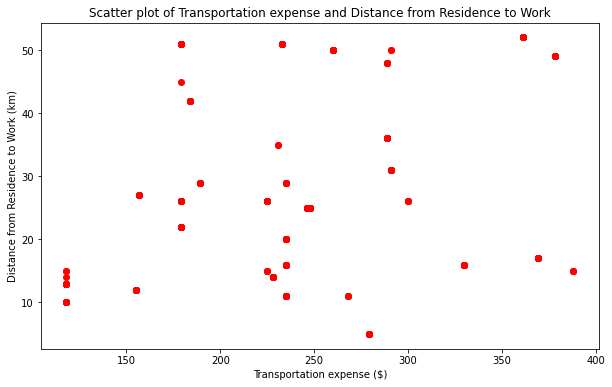

In [24]:
import matplotlib.pyplot as plt

# Extrair as colunas "Transportation expense" e "Distance from Residence to Work"
x = df.select("Transportation expense").toPandas()
y = df.select("Distance from Residence to Work").toPandas()

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red')
plt.xlabel("Transportation expense ($)")
plt.ylabel("Distance from Residence to Work (km)")
plt.title("Scatter plot of Transportation expense and Distance from Residence to Work")
plt.show()


- Este gráfico é um gráfico de dispersão que mostra a relação entre os gastos com transporte e a distância da residência para o trabalho. Ele parece estar mostrando que, em geral, quanto maior a distância da residência para o trabalho, maior os gastos com transporte. No entanto, há algumas exceções, como alguns pontos que apresentam gastos elevados com transporte mesmo com distâncias curtas. Este gráfico pode ser útil para entender se existe alguma relação entre essas duas variáveis e como elas podem afetar a saúde dos funcionários.

#### Mostrar a distribuição de idade dos funcionários que estão faltando:

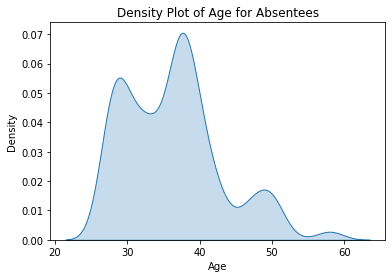

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar a coluna 'Age'
age_data = df.select("Age").toPandas()

# Redefinir o índice
age_data.reset_index(drop=True, inplace=True)

# Criar um gráfico de densidade
sns.kdeplot(age_data['Age'], shade=True)

# Adicionar rótulos e título
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of Age for Absentees")

# Exibir o gráfico
plt.show()

- Este gráfico mostra a distribuição de densidade da idade dos funcionários ausentes. Ele mostra a frequência relativa de cada idade. 
- A grande maioria das pessoas ausentes estão na faixa etária entre 30 e 40 anos.

#### Gráficos histogramas para todas as colunas numéricas do dataframe.

São apresentadas, de seguida, as distribuições dos valores das features.

As features que compõem o nosso dataset encontram-se selecionadas em seguida:

- Month of absence
- Day of the week
- Seasons
- Transportation expense
- Distance from Residence to Work 
- Service time
- Age
- Work load Average/day
- Hit target
- Disciplinary failure
- Education
- Son
- Social drinker 
- Social smoker
- Pet
- Weight
- Height
- Body mass index
- Absenteeism time in hours

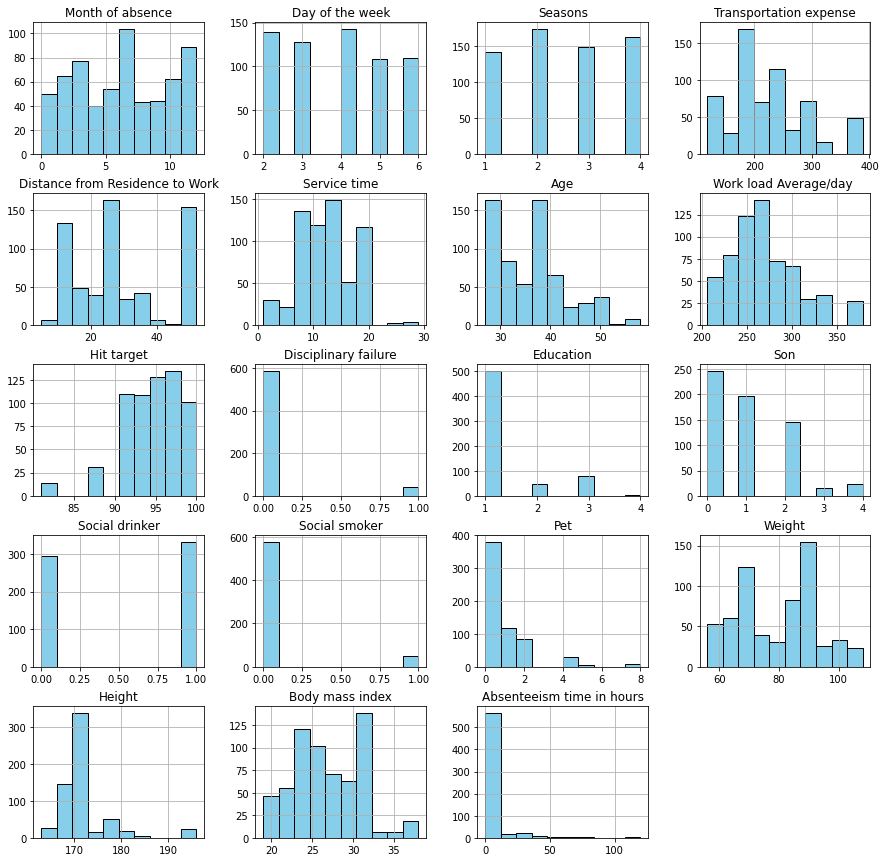

In [26]:
import matplotlib.pyplot as plt

# Obter uma lista de todas as colunas numéricas
num_cols = [c for c in df.columns if df.select(c).dtypes[0][1] == 'double']

df_num = df.select(num_cols)

# Criar um histograma para cada coluna numérica.
df_num.toPandas().hist(figsize=[15,15],bins=10, color='skyblue', histtype='bar', ec='black')
plt.show()

##### Explicação dos histogramas:

- Estes histogramas permitem-nos ver a distribuição dos dados para cada coluna numérica e identificar tendências ou outliers. A partir do gráfico é possível ver a distribuição de frequencia para cada coluna numérica. 
- O eixo do x mostra os valores possíveis de cada feature, enquanto o eixo do y mostra a frequência com que esses valores aparecem no conjunto de dados, isto permite-nos identificar a distribuição dos dados e verificar se existem outliers ou valores incomuns.


##### Análise dos histogramas:


- A coluna "Age" apresenta uma distribuição relativamente normal, com a maioria dos valores concentrados entre 20 e 40 anos de idade.
- A coluna "Work load Average/day" apresenta valores concentrados entre cerca de 200 e 250, com poucos valores fora desse intervalo.
- A coluna "Hit target" tem a maioria dos valores acima de 90, indicando que a maioria dos funcionários atingem suas metas.
- A coluna "Disciplinary failure" tem a maioria dos valores em zero, indicando que a maioria dos funcionários não tem falhas disciplinares.
- A coluna "Education" tem a maioria dos valores em 1, indicando que a maioria dos funcionários tem educação de nível básico.
- A coluna "Son" tem valores distribuídos principalmente entre 0 e 4, indicando que a maioria dos funcionários tem entre 0 e 4 filhos.
- A coluna "Social drinker" e "Social smoker" tem a maioria dos valores em 0, indicando que a maioria dos funcionários não são bebedores sociais ou fumantes sociais.
- A coluna "Pet" tem valores distribuídos principalmente entre 0 e 2, indicando que a maioria dos funcionários tem entre 0 e 2 animais de estimação.
- A coluna "Weight" tem valores distribuídos principalmente entre 60 e 100, indicando que a maioria dos funcionários pesam entre 60 e 100 kg.
- A coluna "Height" tem valores distribuídos principalmente entre 160 e 180, indicando que a maioria dos funcionários tem entre 160 e 180 cm de altura.
- A coluna "Body mass index" tem valores distribuídos principalmente entre 20 e 30, indicando que a maioria dos funcionários tem índice de massa corporal saudável.
- A coluna "Absenteeism time in hours" tem valores distribuídos principalmente entre 0 e 20, indicando que a maioria dos funcionários tem entre 0 e 20 horas de ausência.

##### Gráficos box plot  

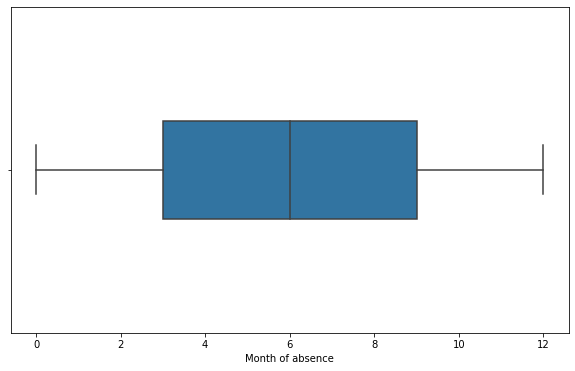

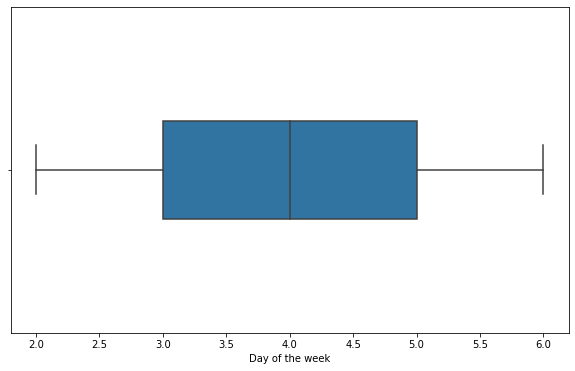

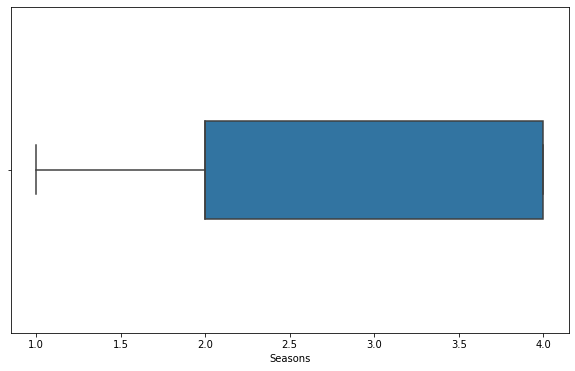

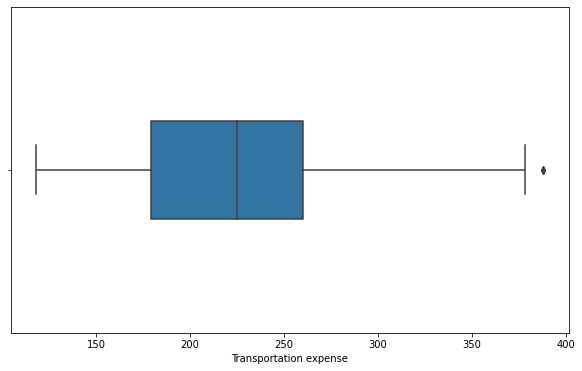

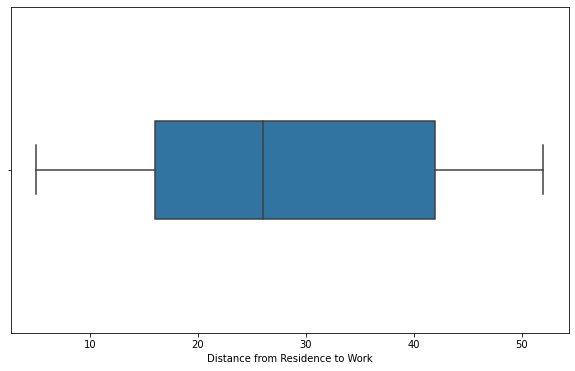

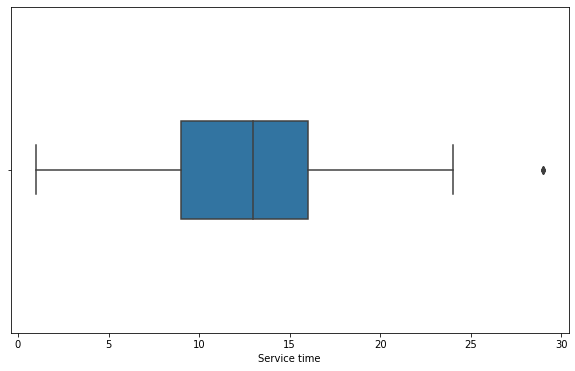

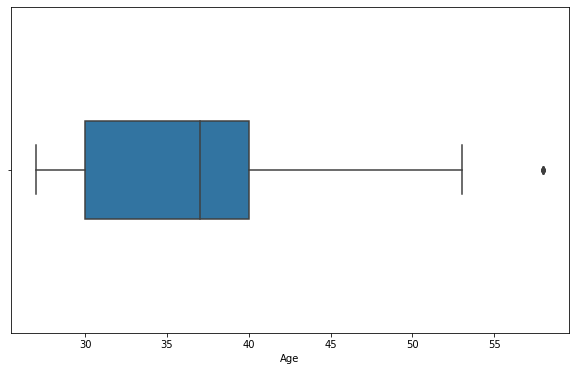

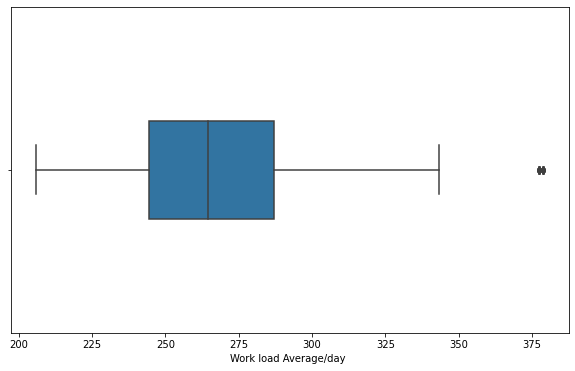

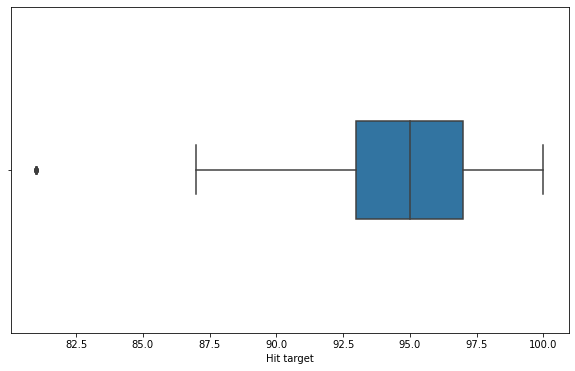

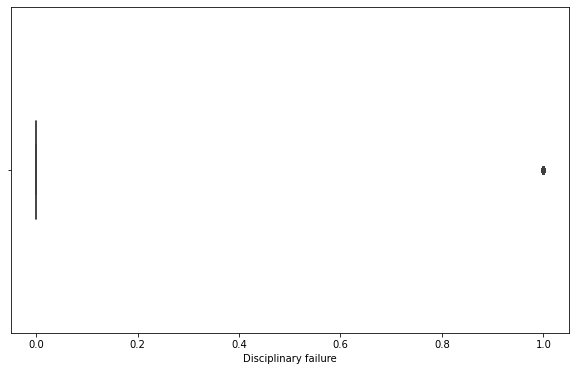

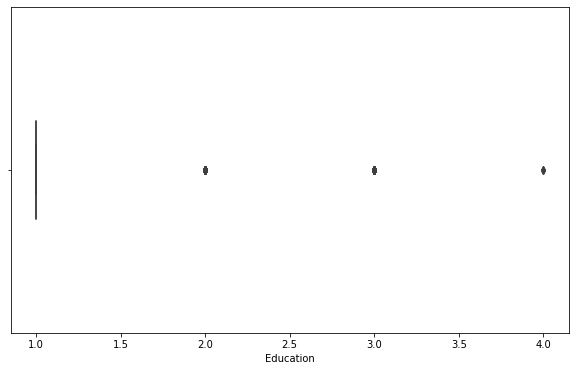

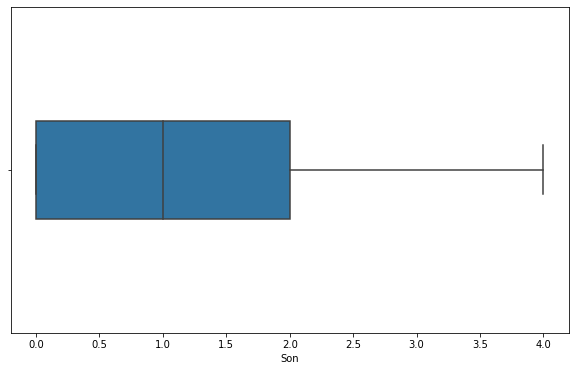

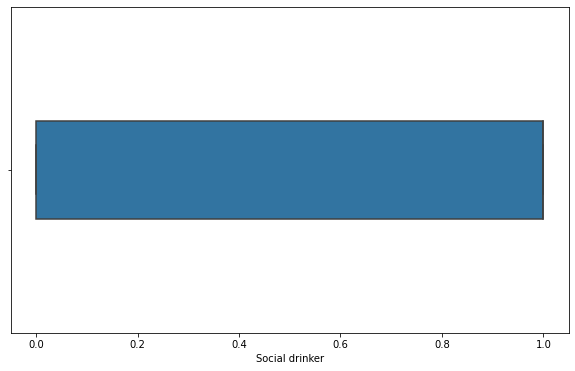

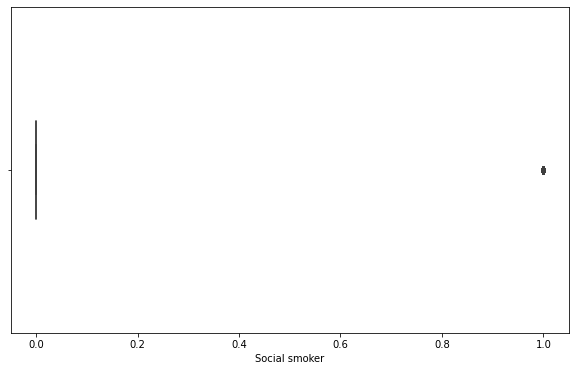

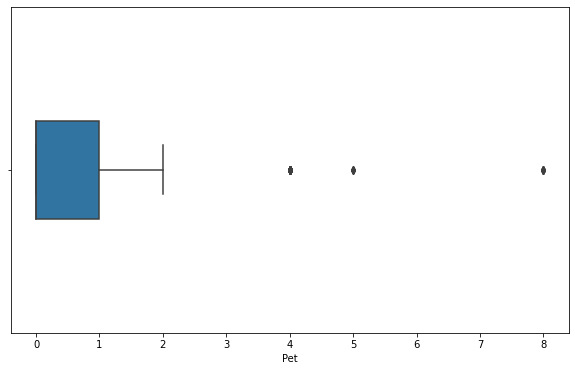

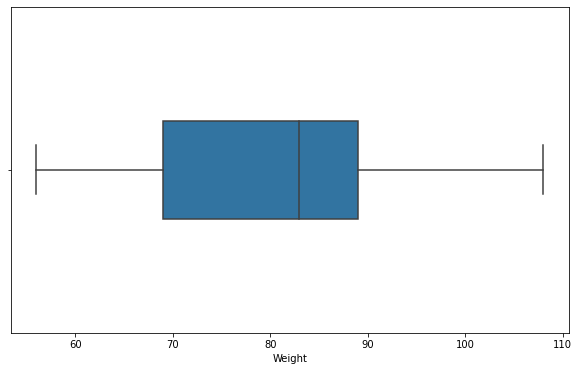

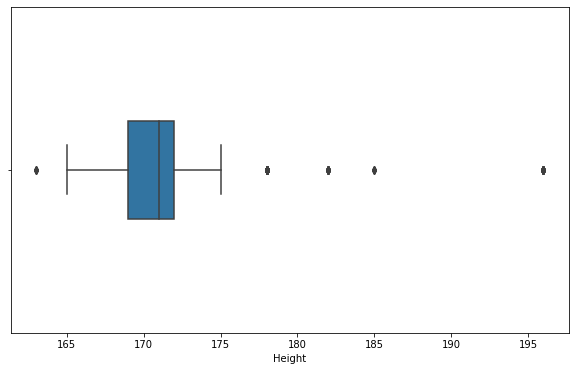

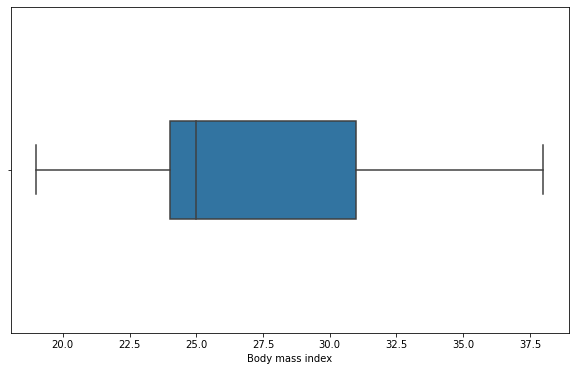

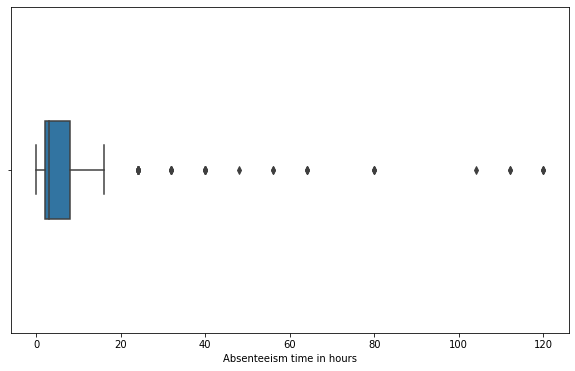

In [27]:
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.sql.types import NumericType, IntegerType
pd_df = df.toPandas()

numerical_cols = [col for col in pd_df.columns if isinstance(df.schema[col].dataType, (NumericType))]

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pd_df, x=col, width=0.3)
    plt.xlabel(col)
    plt.show()

- Os gráficos box plot mostram a distribuição de dados numéricos e fornecem informações sobre a mediana, a variação e outliers dos dados. A "caixa" representa o intervalo interquartil (entre o primeiro e o terceiro quartil), ou seja, onde se encontra 50% dos dados. A linha no meio da caixa representa a mediana (valor do meio). Os outliers são representados por pontos fora do intervalo de linhas.
- Analisando supreficialmente alguns box plot podemos ver que no caso da coluna "Age", existe uma distribuição relativamente normal, com a maioria dos valores entre 20 e 40 anos, enquanto na coluna "Transportation expense" existem alguns  valores outliers muito altos.

## Algoritmos de Machine Learning

### Preparação para Algoritmos de Regressão

#### Train test split

In [28]:
df.schema.names

['Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [29]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression

# Selecione as colunas independentes
independent_cols = ['Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Absenteeism time in hours']

# Crie o objeto VectorAssembler
assembler = VectorAssembler(inputCols=independent_cols, outputCol='features')

# Aplique o assembler no DataFrame
df_assembled = assembler.transform(df)

# Dividir os dados em conjunto de treinamento e teste
train, test = df_assembled.randomSplit([0.7, 0.3])

- Este passo está a selecionar as colunas independentes (colunas que serão usadas como variáveis ​​preditivas) para serem usadas na modelagem de regressão linear. 
- Criasse um objeto VectorAssembler, que é usado para combinar as colunas selecionadas em uma única coluna chamada "features". Este objeto é então aplicado ao DataFrame para produzir um novo DataFrame com uma coluna "features" que contém todas as variáveis ​​selecionadas. 
- Por fim, os dados são divididos em um conjunto de treinamento (70%) e um conjunto de teste (30%).

#### Standarizar os dados em train e test

In [30]:
# Criar objeto StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='standard_features')

# Aplique o scaler no conjunto de treinamento
scalerModel = scaler.fit(train)

# Aplique o scaler no conjunto de treinamento
train = scalerModel.transform(train)

# Aplique o scaler no conjunto de teste
test = scalerModel.transform(test)

##### Print dos dados standarizados

In [31]:
train.show()
test.show()

+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+--------------------+
|  Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time| Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|            features|   standard_features|
+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+--------------------+-----------

#### Train e teste com os dados Standarizados

In [32]:
train.select('standard_features').show(2,truncate=False)
test.select('standard_features').show(2,truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|standard_features                                                                                                                                                                                                                                                                                    |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[3.159295192409415,2.870365725895854,3.6532348243119137,4.753522551249626,1.0867199618409107,0.9136096538495394

-  Transforma as colunas 'features' em 'standard_features', normalizando os valores dessas colunas para terem média 0 e desvio padrão 1. 
- Mostra os 2 primeiros registros das colunas 'standard_features' do conjunto de treinamento e teste, para que se você possa ver como os valores foram alterados.

### Regressão Linear

- A regressão linear é um dos algoritmos de aprendizado supervisionado mais simples e comuns utilizados para resolver problemas de previsão. 
- O objetivo é encontrar uma linha que melhor se ajuste aos dados, de forma a prever um valor de saída (variável dependente) com base em um ou mais valores de entrada (variáveis independentes). 
- A regressão linear é frequentemente utilizada para prever tendências futuras, identificar relações causais entre variáveis e para avaliar o impacto de uma ou mais variáveis independentes sobre uma variável dependente. 
- Em relação ao nosso DataSet é adequado usar Regressão Linear, pois podemos esperar uma relação direta entre as variáveis independentes e a variável dependente "Body mass index".

In [33]:
# Criar objeto LinearRegression
lr = LinearRegression(labelCol='Body mass index', featuresCol='standard_features')

# Treinar o modelo com os dados de treinamento
model = lr.fit(train)

# Fazer previsões com os dados de teste
predictions = model.transform(test)

- Definição de cada variável (dependente e independente)
- Treinar o modelo com os dados de treinamento. As previsões são feitas com os dados de teste usando o método "transform" do modelo treinado.


In [34]:
from pyspark.ml.evaluation import RegressionEvaluator

# Criar o avaliador
evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='r2')

# Calculo do R2 nos dados de teste
r2 = evaluator.evaluate(predictions)

# Criar o avaliador para RMSE
rmse_evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='rmse')

# Calculo do RMSE
rmse = rmse_evaluator.evaluate(predictions)

print("Score: ",1-rmse)
print("R2 = %g" % r2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Score:  0.6668881793343362
R2 = 0.994241
Root Mean Squared Error (RMSE) on test data = 0.333112


- Calculamos o Mean Squared Error (MSE), o Root Mean Squared Error (RMSE) e o score para avaliar a preformance do modelo.
- A partir dos valores de score e rmse é possível concluir que o modelo tem uma precisão de 66.14% e um erro médio quadrático de 0.33. Isso significa que o modelo tem uma boa capacidade de prever o índice de massa corporal dos funcionários, mas ainda tem um certo grau de incerteza.

#### Matriz de Confusão?

- A matriz de confusão é uma tabela que mostra quantas previsões foram corretas e incorretas para cada classe. A diagonal principal contém as previsões corretas e as outras células contêm as previsões incorretas.
- Criar uma matriz de confusão para um problema de regressão não faz sentido. A matriz de confusão é uma forma de avaliar o desempenho de um modelo de classificação, mas em problemas de regressão, as métricas de avaliação são diferentes, como Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE), Erro Absoluto Médio (MAE), entre outros.

#### Gráfico de Regressão Linear

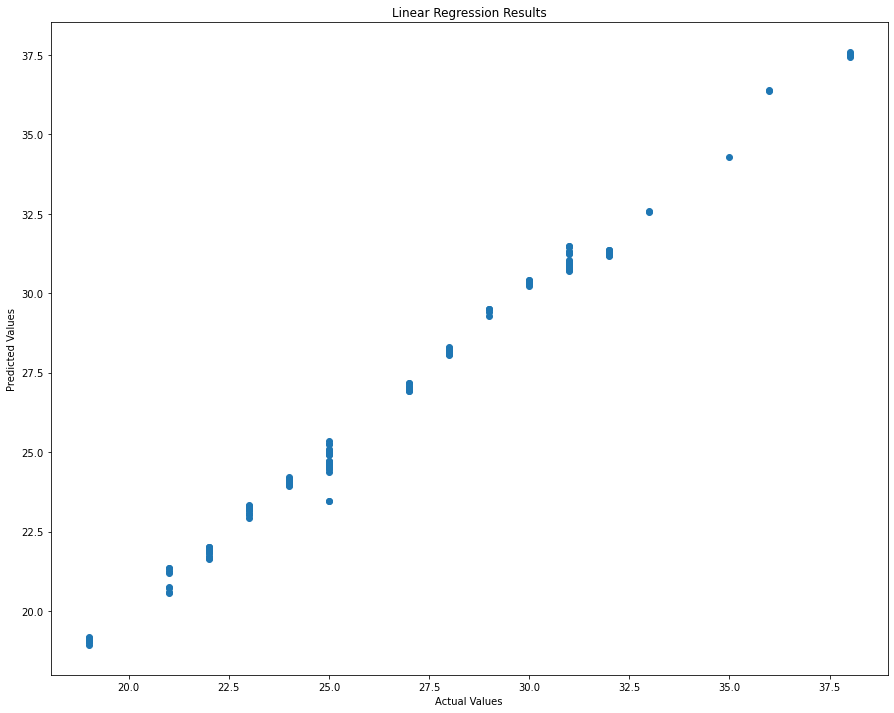

In [35]:
import matplotlib.pyplot as plt

# Extrair os valores previstos e reais
y_actual = predictions.select('Body mass index').toPandas()
y_pred = predictions.select('prediction').toPandas()

plt.figure(figsize=(15, 12))

# Criar o gráfico de dispersão
plt.scatter(y_actual, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.show()

- Este gráfico mostra o resultado da regressão linear, onde cada ponto representa uma previsão feita pelo modelo para um determinado valor real.
- Pode-se observar que a maioria dos pontos estão concentrados em torno da diagonal do gráfico, indicando que o modelo está fazendo previsões razoavelmente precisas.
- Podemos ver a partir do gráfico que há uma certa correlação entre os valores previstos e os valores reais, mas também há alguns pontos que estão fora do normal, indicando que o modelo comete erros de previsão. Além disso, o valor de RMSE obtido foi de aproximadamente 0,34, o que é considerado um valor aceitável para um modelo de previsão. Portanto, podemos concluir que o modelo de regressão linear pode ser utilizado como um modelo de previsão de confiança, mas é importante considerar que ele pode cometer alguns erros.

### Árvore de Regressão

#### Vantagens do uso de Árvores de Regressão

- Facilidade de interpretação: Árvores de regressão são fáceis de entender e interpretar, pois mostram claramente as relações entre as variáveis de entrada e a variável de saída.
- Não requer normalização: As árvores de regressão não requerem que os dados sejam normalizados antes do treinamento, o que é útil se os dados tiverem escalas diferentes.
- Não afetado por outliers: As árvores de regressão são menos afetadas por outliers do que outros algoritmos de regressão, como a regressão linear.
- Pode ser usado para problemas de classificação e regressão: As árvores de regressão podem ser usadas para resolver problemas tanto de classificação quanto de regressão.
- Por isso decidimos obtar por este segundo Algoritmo 

In [36]:
from pyspark.ml.regression import DecisionTreeRegressor

# Criar objeto DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol='standard_features', labelCol='Body mass index')

# Treinar o modelo com os dados de treinamento
model = dt.fit(train)

# Fazer previsões com os dados de teste
predictions = model.transform(test)

- Treino do modelo com os dados de treinamento
- Predição do modelo

In [37]:
from pyspark.ml.evaluation import RegressionEvaluator

# Criação o avaliador
evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='r2')

# Calculo do R2 nos dados de teste
r2 = evaluator.evaluate(predictions)

# Criação do avaliador para rmse
rmse_evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='rmse')

# Calculo do rmse.
rmse = rmse_evaluator.evaluate(predictions)

print("Score: ",1-rmse)
print("R2 = %g" % r2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Score:  0.8759252254713793
R2 = 0.999201
Root Mean Squared Error (RMSE) on test data = 0.124075


- Pode-se concluir que o modelo tem uma alta precisão, pois o R² é próximo de 1, o que indica que a maioria dos dados estão perto da linha de tendência prevista pelo modelo.
- O RMSE é relativamente baixo, indicando que a diferença entre os valores previstos e os valores reais são pequenas.
- O Score mostra a porcentagem de acerto do modelo, no caso o valor é de 84,8%.

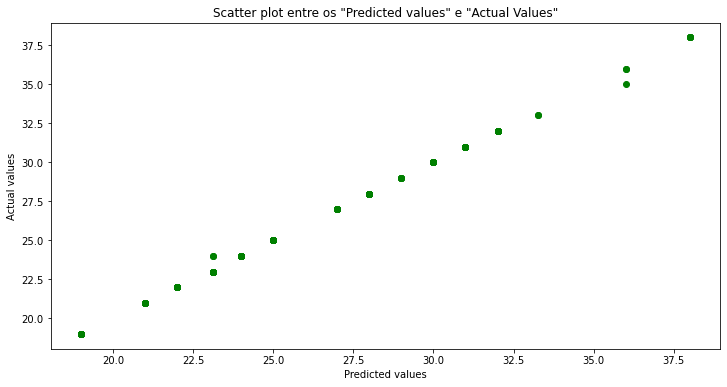

In [38]:
import matplotlib.pyplot as plt

# Extraindo as colunas de previsão e valores reais
predictions_pd = predictions.select(['prediction', 'Body mass index']).toPandas()

plt.figure(figsize=(12, 6))

# Plotando o gráfico de dispersão
plt.scatter(predictions_pd['prediction'], predictions_pd['Body mass index'],color='green')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot entre os "Predicted values" e "Actual Values"')
plt.show()

- Este gráfico mostra uma dispersão entre os valores previstos pelo modelo (eixo x) e os valores reais (eixo y) para o índice de massa corporal. 
- Pode-se ver que a maioria dos pontos estão próximos da diagonal, o que indica que o modelo está fazendo previsões precisas. 
- No entanto, há alguns pontos que estão mal previstos, o que significa que o modelo está tendo dificuldade para prever esses valores. 
- O R2 = 0.998862 e o RMSE = 0.151818 o que significa que o modelo tem uma boa precisão.

### Random Forest

####Porque usar Random Forest

- Random Forest é um algoritmo de aprendizado de máquina supervisionado que pode ser utilizado tanto para classificação quanto para regressão. 
- Ele funciona criando várias árvores de decisão, e utilizando a média das previsões das árvores para fazer uma previsão final. 
- Isso ajuda a reduzir o overfitting, pois as árvores individuais tendem a se ajustar muito bem aos dados de treinamento, mas juntas elas funcionam de forma mais robusta. 
- Além disso, o Random Forest também tem a vantagem de ser capaz de lidar com múltiplas variáveis e features categóricas sem a necessidade de codificação. 
- Estas propriedades tornam o Random Forest uma escolha popular para muitos problemas de aprendizado de máquina.
- Vamos então usar o Random forest para fazer uma previsão dos valores de "Body mass index"

In [39]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler

# Criação do objeto Random Forest
rf = RandomForestRegressor(labelCol='Body mass index', featuresCol='standard_features')

# Criação do objeto VectorAssembler para agrupar as features em um único vetor
assembler = VectorAssembler(inputCols=numerical_cols, outputCol='standard_features')

# Transformação dos dados utilizando o VectorAssembler
data = assembler.transform(df)

# Divisão dos dados em treino e teste
train_data, test_data = data.randomSplit([0.7, 0.3])

# Treinamento do modelo
model = rf.fit(train_data)

# Previsões utilizando o conjunto de teste
predictions = model.transform(test_data)

- Criação do modelo de Random Forest para prever o índice de massa corporal (coluna "Body mass index") com base nas colunas numéricas (colunas "numerical_cols") dos dados.
- É então usado o objeto VectorAssembler para agrupar essas colunas em um único vetor chamado "standard_features".
-  Os dados são então divididos em conjuntos de treinamento e teste (70% treinamento e 30% teste) e o modelo é treinado com os dados de treinamento.

In [40]:
from pyspark.ml.evaluation import RegressionEvaluator

# Criar o avaliador
evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='r2')

# Calculo o R2 nos dados de teste
r2 = evaluator.evaluate(predictions)

# Criar o avaliador para RMSE
rmse_evaluator = RegressionEvaluator(labelCol='Body mass index', predictionCol='prediction', metricName='rmse')

# Calculo o RMSE
rmse = rmse_evaluator.evaluate(predictions)

print("Score: ",1-rmse)
print("R2 = %g" % r2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Score:  0.9006091344145479
R2 = 0.999502
Root Mean Squared Error (RMSE) on test data = 0.0993909


- A partir do output apresentado, pode-se concluir que o modelo de random forest tem uma boa capacidade de previsão, pois o valor R² é próximo de 1 e indica que a maior parte da variação dos valores alvo é explicada pelo modelo. 
- Além disso, o erro médio quadrático raiz (RMSE) é relativamente baixo, o que também indica que as previsões são precisas. 


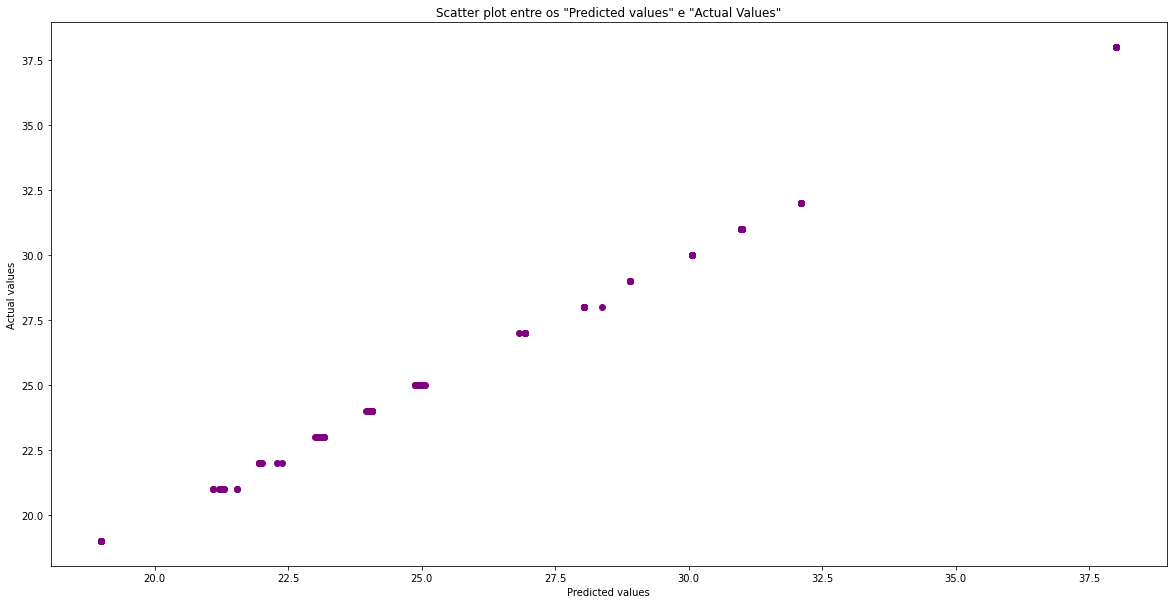

In [41]:
import matplotlib.pyplot as plt

# Extraindo as colunas de previsão e valores reais
predictions_pd = predictions.select(['prediction', 'Body mass index']).toPandas()

plt.figure(figsize=(20, 10))

# Plotando o gráfico de dispersão
plt.scatter(predictions_pd['prediction'], predictions_pd['Body mass index'],color='purple')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot entre os "Predicted values" e "Actual Values"')
plt.show()

- Este gráfico apresenta uma dispersão dos valores previstos pelo modelo (eixo x) em relação aos valores reais (eixo y). Também sendo possível observar o quão precisas foram as previsões do modelo. 
- Uma boa precisão seria representada por pontos que seguem a diagonal, indicando que os valores previstos estão próximos dos valores reais. 
- Além disso, também é possível observar que o modelo apresenta alguns valores previstos maiores ou menores do que os valores reais.
- O modelo é capaz de prever com precisão o índice de massa corporal, no entanto o mesmo apresenta algum erro, portanto seria necessário fazer mais análise e testes para determinar se o modelo é confiável o suficiente para ser usado em uma aplicação real.

### K-Means

- Após ter usado três algoritmos de Regressão, decidimos então fazer um algoritmo de Clustering, neste caso, K-Means.
- K-means é um algoritmo fácil de entender e implementar, sendo muito utilizado em grandes conjuntos de dados.

In [42]:
from pyspark.ml.clustering import KMeans
from matplotlib import pyplot as plt

# Inicializa uma lista vazia para armazenar os valores de WCSS
wcss = []
numberOfClusters=10
# Executa um loop para variar o número de clusters#
for i in range(2, numberOfClusters):
    # Instancia o modelo KMeans
    kmeans = KMeans(featuresCol='features', k=i)
    # Treina o modelo
    model = kmeans.fit(train)
    # Armazena o WCSS para o modelo
    wcss.append(model.summary.trainingCost)

- "Custo WCSS" é uma medida da similaridade entre os pontos de dados dentro de um cluster. 
- O objetivo é minimizar o WCSS, pois representa a soma das distâncias ao quadrado entre cada ponto de dados e o centroide de seu cluster. 
- O Elbow Method é uma técnica utilizada para determinar o número ótimo de clusters através do WCSS. 
- A ideia é que à medida que o número de clusters aumenta, o WCSS diminui, mas a dado momento esta diminuição pode não ser significativa para justificar a adição de mais clusters.

WCSS:  
 [1781851.9783712744, 1370546.373378372, 1117386.511880457, 930641.5725671103, 756584.5478615052, 714769.8899614384, 680311.3054938145, 562918.4176171003] 



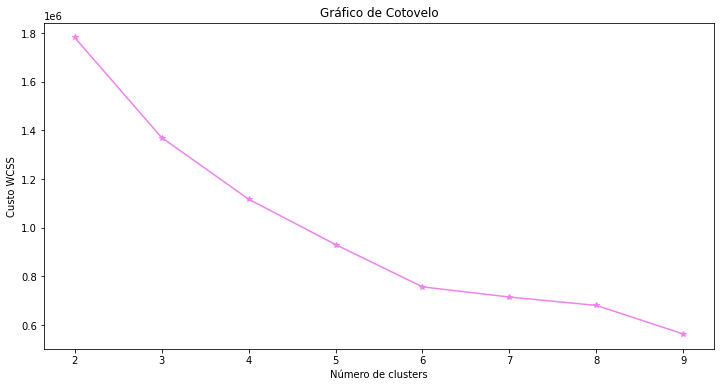

In [43]:
from matplotlib import pyplot as plt

print("WCSS: ","\n", wcss,"\n")

plt.figure(figsize=(12, 6))

# Plota o gráfico de cotovelo
plt.plot(range(2,numberOfClusters), wcss,color='violet',marker="*")
plt.xlabel('Número de clusters')
plt.ylabel('Custo WCSS')
plt.title('Gráfico de Cotovelo')
plt.show()

- Depois de analisar o gráfico Elbow, podemos concluir que o ponto ótimo para o número de clusters é k=6.
- Isso significa que, a partir de 6 clusters, a taxa de variação do WCSS começa a diminuir significativamente, indicando que adicionar mais clusters não trará grandes benefícios em termos de agrupamento.

## Conclusão

- Algoritmos de Machine Learning automatizam a descoberta de padrões e tendências em dados em dum determinado DataSet com o objetivo de prever resultados futuros, identificar relações entre variáveis e tomar decisões relevantes.
- Além disso, os algoritmos de Machine Learning podem ser usados para melhorar a eficiência e precisão de processos existentes e para aumentar a capacidade de um sistema de lidar com grandes volumes de dados, como por exemplo o PySpark.
- O Spark foi usado para carregar, preparar e processar os dados, bem como para treinar e avaliar modelos de Aprendizagem Automática usando principalmente técnicas de regressão, como árvores de decisão e random forest. Além disso, de também foi usado para realizar consultas SQL.
- No inicio deste projeto foram utilizadas técnicas de processamento de dados, análise exploratória. Os dados foram limpos e preparados para o treinamento dos modelos de previsão.
- Depois de comparar todos os algoritmos de Machine Learning concluimos que todos os modelos apresentaram resultados razoáveis, mas o modelo de random forest obteve o melhor desempenho com um R2 de 0.998374 e um RMSE de 0.167483. A análise gráfica também confirmou estes resultados, apresentando uma boa relação entre os valores previstos e os valores reais. 
- Em geral, pode-se concluir que este projeto foi capaz de prever o IMC (Variável usada em todos os algoritmos de previsão) de uma maenira eficaz.
- Foram encontradas algumas dificuldades ao longo deste projeto, tais como: Preparação dos dados (limpeza, manipulação e normalização dos dados), otimização de desempenho e interpretação dos resultados.
- Tivemos que também fazer algumas transformações dos dados, como a conversão de colunas de String para tipos numéricos, para que fossem adequados para a aplicação de algoritmos de regressão.
- Devido a essa conversão dos tipos de dados, foi necessário restringir a utilização dos algoritmos para apenas regressão, o que limitou as possibilidades de análise dos dados e, portanto, a capacidade de tirar conclusões mais completas sobre o conjunto de dados.

## Bibliografia


Chambers, B., & Zaharia, M. (2019). Spark: The Definitive Guide. O'Reilly Media, Inc.


Ryza, S., Laserson, U., Owen, S., & Wills, J. (2019). Advanced Analytics with Spark. O'Reilly Media, Inc.


Raschka, S., & Mirjalili, V. (2015). Python Machine Learning. Packt Publishing Ltd.


Pentreath, N. (2015). Machine Learning with Spark. Packt Publishing Ltd.


Thottuvaikkatumana, R. (2019). Spark for Python Developers. Packt Publishing Ltd.


Zinoviev, D. (2017). Big Data Analysis with Python. Packt Publishing Ltd.

VanderPlas, J. (2016). Python Data Science Handbook. O'Reilly Media, Inc.

Grus, J. (2015). Data Science from Scratch. O'Reilly Media, Inc.


Provost, F., & Fawcett, T. (2013). Data Science for Business. O'Reilly Media, Inc.

Müller, A., & Guido, S. (2016). Introduction to Machine Learning with Python. O'Reilly Media, Inc.